In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline
today = '2020-04-11'
start_date='2012-04-01'
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300

In [64]:
bist = pd.DataFrame({'pgsus' : yf.download('PGSUS.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'], 
                       'akbnk' : yf.download('AKBNK.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'], 
                       'arclk' : yf.download('ARCLK.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'asels' : yf.download('ASELS.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'bimas' : yf.download('BIMAS.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'ccola' : yf.download('CCOLA.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'dohol' : yf.download('EKGYO.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'enjsa' : yf.download('ENJSA.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'enkai' : yf.download('ENKAI.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'eregl' : yf.download('EREGL.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'froto' : yf.download('FROTO.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'garan' : yf.download('GARAN.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'halkb' : yf.download('HALKB.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'kchol' : yf.download('KCHOL.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'krdmd' : yf.download('KRDMD.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'mgros' : yf.download('MGROS.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'petkm' : yf.download('PETKM.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'sahol' : yf.download('SAHOL.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'sasa' : yf.download('SASA.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'soda' : yf.download('SODA.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'tavhl' : yf.download('TAVHL.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'tcell' : yf.download('TCELL.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'thyao' : yf.download('THYAO.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'tkfen' : yf.download('TKFEN.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'toaso' : yf.download('TOASO.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'trkcm' : yf.download('TRKCM.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'tskb' : yf.download('TSKB.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'ttkom' : yf.download('TTKOM.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'tuprs' : yf.download('TUPRS.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'ulker' : yf.download('ULKER.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'vakbn' : yf.download('VAKBN.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close'],
                       'ykbnk' : yf.download('YKBNK.IS', start=start_date, end=today, adjusted=True, progress=False, interval ='1d')['Adj Close']})

In [65]:
bist = bist.resample('W').last()
bist_ret = pd.DataFrame()
for column in bist.columns:
    bist_ret[column]= bist[column].pct_change(1)

In [66]:
for column in bist_ret.columns:
    pgsus_=[]
    for return_ in range(len(bist_ret[column])):
        if return_ == 0:
            pgsus_.append(0)
            continue
        elif return_ == 1:
            pgsus_.append(0)
            continue
        elif return_ == 2:
            pgsus_.append(0)
            continue
        elif ((bist[column][return_-2] > bist[column][return_-1]) and
        (bist[column][return_-1] > bist[column][return_]) and
        (bist[column][return_]/bist[column][return_-2] - 1 > -0.13) and 
        (bist[column][return_]/bist[column][return_-2] - 1 < -0.06)):
            pgsus_.append(1)                                                                                                                                                                                                                                                                  
        else:
            pgsus_.append(0)
    bist_ret[column+'_'] = pgsus_

In [67]:
bist_ret.columns[-32:]

Index(['pgsus_', 'akbnk_', 'arclk_', 'asels_', 'bimas_', 'ccola_', 'dohol_',
       'enjsa_', 'enkai_', 'eregl_', 'froto_', 'garan_', 'halkb_', 'kchol_',
       'krdmd_', 'mgros_', 'petkm_', 'sahol_', 'sasa_', 'soda_', 'tavhl_',
       'tcell_', 'thyao_', 'tkfen_', 'toaso_', 'trkcm_', 'tskb_', 'ttkom_',
       'tuprs_', 'ulker_', 'vakbn_', 'ykbnk_'],
      dtype='object')

In [68]:
portfolio = bist_ret.copy()

In [69]:
portfolio = portfolio.drop(portfolio.columns[:], axis=1)

In [70]:
for column in bist_ret.columns[:32]:
    money=10000
    cumret = [None] * len(bist_ret[column])
    cumret[0] = money
    for return_ in range(len(bist_ret[column])):
        if return_ == len(bist_ret[column])-1 :
            continue
        if bist_ret[column+'_'][return_] == 1:
            cumret[return_+1] = cumret[return_] * (1+bist_ret[column][return_+1])
        else:
            cumret[return_+1] = cumret[return_] * (1 + 0.0003717*5)
    portfolio[column + '_port_ret'] = cumret
            

In [71]:
bist_ret.columns[:32]

Index(['pgsus', 'akbnk', 'arclk', 'asels', 'bimas', 'ccola', 'dohol', 'enjsa',
       'enkai', 'eregl', 'froto', 'garan', 'halkb', 'kchol', 'krdmd', 'mgros',
       'petkm', 'sahol', 'sasa', 'soda', 'tavhl', 'tcell', 'thyao', 'tkfen',
       'toaso', 'trkcm', 'tskb', 'ttkom', 'tuprs', 'ulker', 'vakbn', 'ykbnk'],
      dtype='object')

In [72]:
type(portfolio)

pandas.core.frame.DataFrame

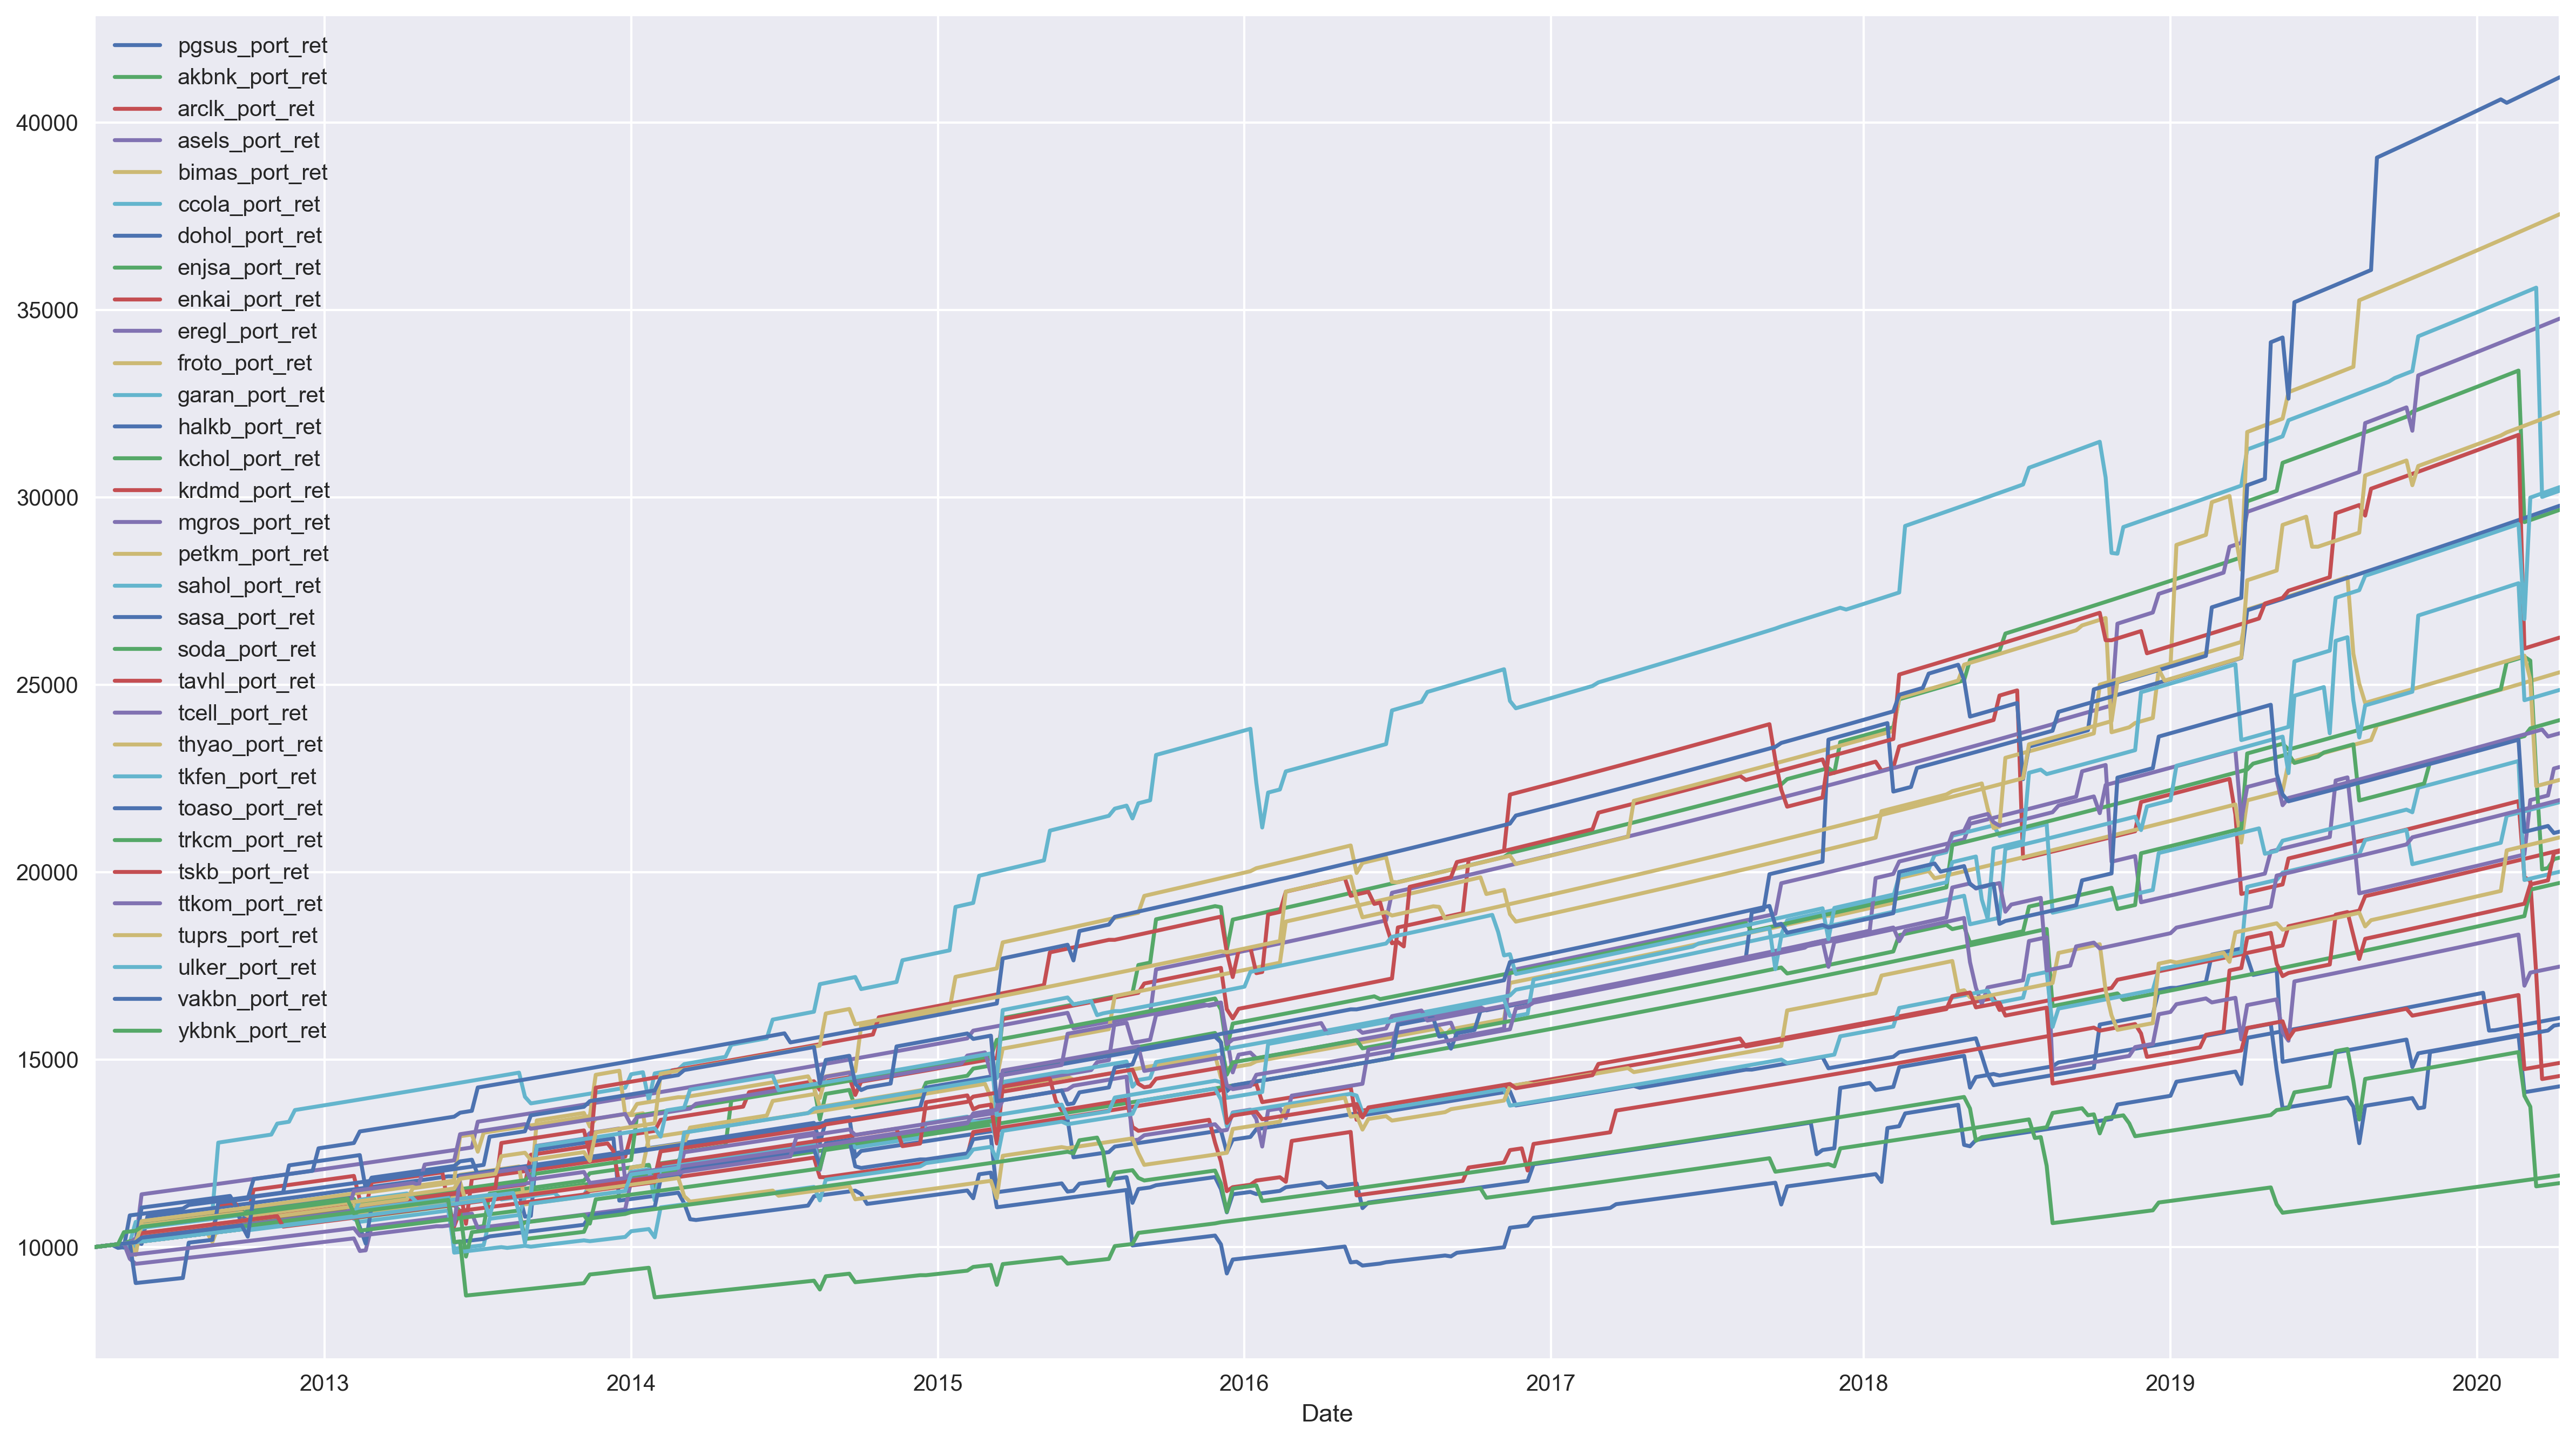

In [73]:
portfolio.plot()
plt.legend(loc='upper left')
plt.tight_layout()

In [74]:
portfolio.iloc[-1].sort_values(ascending=False)

toaso_port_ret    41205.005732
froto_port_ret    37552.041129
asels_port_ret    34766.932887
tuprs_port_ret    32265.679996
ulker_port_ret    30271.616393
ccola_port_ret    30177.340730
sasa_port_ret     29775.664735
akbnk_port_ret    29666.251226
tavhl_port_ret    26258.625113
bimas_port_ret    25333.073823
tkfen_port_ret    24862.608802
soda_port_ret     24057.016024
tcell_port_ret    23705.656535
eregl_port_ret    22806.622733
petkm_port_ret    22462.408093
ttkom_port_ret    21923.935985
sahol_port_ret    21868.394406
vakbn_port_ret    21083.211535
thyao_port_ret    20928.082298
enkai_port_ret    20582.748069
krdmd_port_ret    20549.588608
kchol_port_ret    20387.539754
garan_port_ret    20012.577403
enjsa_port_ret    19714.675740
mgros_port_ret    17481.905328
pgsus_port_ret    16110.937272
halkb_port_ret    15935.663256
tskb_port_ret     14912.718226
arclk_port_ret    14563.547008
dohol_port_ret    14287.851612
ykbnk_port_ret    11910.781471
trkcm_port_ret    11706.158377
Name: 20

In [75]:
bist_ret.iloc[-1].tail(32)

pgsus_    0.0
akbnk_    0.0
arclk_    0.0
asels_    0.0
bimas_    0.0
ccola_    0.0
dohol_    0.0
enjsa_    0.0
enkai_    0.0
eregl_    0.0
froto_    0.0
garan_    0.0
halkb_    0.0
kchol_    0.0
krdmd_    0.0
mgros_    0.0
petkm_    0.0
sahol_    0.0
sasa_     0.0
soda_     0.0
tavhl_    0.0
tcell_    0.0
thyao_    0.0
tkfen_    0.0
toaso_    0.0
trkcm_    0.0
tskb_     0.0
ttkom_    0.0
tuprs_    0.0
ulker_    0.0
vakbn_    0.0
ykbnk_    0.0
Name: 2020-04-12 00:00:00, dtype: float64

In [76]:
bist_ret

,pgsus,akbnk,arclk,asels,bimas,ccola,dohol,enjsa,enkai,eregl,...,thyao_,tkfen_,toaso_,trkcm_,tskb_,ttkom_,tuprs_,ulker_,vakbn_,ykbnk_
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2012-04-15,NaN,-0.011593,0.000000,0.000000,0.022472,0.026786,0.000000,NaN,0.055555,-0.017091,...,0,0,0,0,0,0,0,0,0,0
2012-04-22,NaN,-0.023460,-0.058974,-0.014425,0.000000,-0.034783,0.004256,NaN,0.010527,-0.028986,...,0,0,0,0,0,0,0,0,0,0
2012-04-29,NaN,0.006005,0.038147,0.024392,0.054945,0.081081,-0.004238,NaN,-0.048611,0.032835,...,0,0,0,0,0,0,0,0,0,0
2012-05-06,NaN,-0.023880,0.081365,0.033333,-0.027778,0.047917,-0.001116,NaN,0.047445,-0.015555,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-15,-0.190041,-0.121585,-0.125348,-0.147552,-0.047977,-0.085754,-0.173611,-0.113184,-0.104790,-0.089787,...,0,0,0,0,0,0,0,0,0,0
2020-03-22,-0.329918,-0.133748,-0.162420,-0.161290,-0.010870,-0.156833,-0.067227,-0.042076,-0.051839,-0.053021,...,0,0,0,0,0,0,0,0,0,0
2020-03-29,0.320336,-0.005386,0.019011,0.081613,0.002997,0.045455,0.018018,-0.092240,0.003527,-0.040365,...,0,0,0,0,0,0,0,0,1,0
